In [48]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/lib/python3.7/site-packages (0.0)


In [49]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [51]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [52]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

[0.22162371 0.15088384 0.14471677 0.04265802 0.1201244  0.11586638
 0.10396028 0.10016659]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


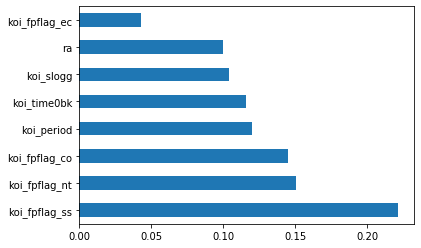

In [53]:
#Used ab ExtraTreesClassifier to obtained the top related features to the response variable
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(selected_features,Response)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=selected_features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [54]:
#I will keep the top 8 as an arbitrary choice"
selected_features= df[["koi_fpflag_ss","koi_fpflag_nt", "koi_fpflag_co","koi_fpflag_ec", "koi_period", "koi_time0bk","koi_slogg", "ra"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [55]:
Response=df["koi_disposition"]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, Response, random_state=1, stratify=Response)

In [57]:
X_train.head()

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,ra
4002,0,0,1,0,99.673478,219.334830,4.777,293.05801
4246,1,0,0,0,0.592244,131.654831,4.664,290.28094
548,1,0,1,0,9.991625,137.447816,4.338,301.04239
3953,1,0,0,0,178.412990,218.225235,4.346,288.32785
2362,0,0,0,0,45.294223,138.678725,4.347,285.67938


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [58]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [59]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7926759488842265
Testing Data Score: 0.7951945080091534


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [60]:
#Support Vector Machine
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.7926759488842265
Testing Data Score: 0.782608695652174


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [61]:
import numpy as np

In [62]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,5,10,100,1000],}          
grid = GridSearchCV(model, param_grid, verbose=3)

In [63]:
# Train the model with GridSearch
trained_grid = grid.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' i

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.807, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.788, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.784, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.805, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.783, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.789, total=   0.0s
[CV] C=10 ............................................................
[CV] ............

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

In [64]:
#Linear Regression
print(trained_grid.best_params_)
print(trained_grid.best_score_)

{'C': 1000}
0.7932481403776463


In [65]:
# Create the GridSearchCV model   
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [66]:
# Train the model with GridSearch
trained_grid2 = grid2.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.793, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.780, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.793, total=   0.1s
[CV] C=5 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. C=5, score=0.801, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.785, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.796, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.801, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.787, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.795, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.805, total=   0.1s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.6s finished


In [67]:
#SPM
print(trained_grid2.best_params_)
print(trained_grid2.best_score_)

{'C': 1000}
0.7947739843600992


# Save the Model

In [40]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'AlejandroGzzSawnz.sav'
joblib.dump(trained_grid, filename)

['AlejandroGzzSawnz.sav']

In [68]:
filename = 'AlejandroGzzSawnz2.sav'
joblib.dump(trained_grid2, filename)

['AlejandroGzzSawnz2.sav']

# Discussion

Both classifiers performance is pretty similar. 
To improve the performance of the models I could better understand the variables that affect if
a celestial body can be an exo planet, as I kind of only used an automated feature selector for 
this challenge. Also I could try and use another type of model, check for skewness in certain features,
or try different ways to normalize my data.